## simple hand landmark inference

In [4]:
import cv2
import time
import numpy as np

net = cv2.dnn.readNet('hand_landmark.onnx')
outNames = net.getUnconnectedOutLayersNames()
print(outNames)
img = cv2.imread('palm.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
tensor = img / 127.5 - 1.0
blob = cv2.dnn.blobFromImage(tensor.astype(np.float32), swapRB=False, crop=False)


print(blob.shape)
time_start = time.time()
net.setInput(blob)
preds = net.forward(outNames)

print(f"spend time : {time.time() - time_start}")
for pred in preds:
    print(pred.shape)
    print(pred)
    print()

('Identity', 'Identity_1', 'Identity_2')
(1, 3, 224, 224)
spend time : 0.013951778411865234
(1, 63)
[[ 6.15600014e+01  1.79525024e+02 -7.26944208e-03  1.05022980e+02
   1.78844910e+02 -2.35644102e+00  1.37269485e+02  1.64272141e+02
  -7.34674168e+00  1.61872314e+02  1.44259552e+02 -1.17645149e+01
   1.81913605e+02  1.28508774e+02 -1.69434185e+01  1.24611259e+02
   1.18871712e+02 -1.91208534e+01  1.51054260e+02  8.02833862e+01
  -2.37940578e+01  1.66058487e+02  5.74945450e+01 -2.59115543e+01
   1.78017532e+02  3.95996399e+01 -2.76820755e+01  9.89765244e+01
   1.08267319e+02 -1.93883457e+01  1.17420670e+02  6.64731445e+01
  -2.63330879e+01  1.29082321e+02  4.04516258e+01 -2.97618351e+01
   1.39414551e+02  1.91233864e+01 -3.34708290e+01  7.32116852e+01
   1.05783615e+02 -1.83143272e+01  8.50020218e+01  6.65741348e+01
  -2.35014153e+01  9.41094742e+01  4.07012901e+01 -2.62362099e+01
   1.03378761e+02  2.01703453e+01 -2.94752808e+01  4.97371674e+01
   1.09679016e+02 -1.60185814e+01  5.02876

In [5]:
np.set_printoptions(suppress=True)

In [6]:
lms = preds[0].reshape(21, 3) 
print(lms)

[[ 61.56       179.52502     -0.00726944]
 [105.02298    178.84491     -2.356441  ]
 [137.26949    164.27214     -7.3467417 ]
 [161.87231    144.25955    -11.764515  ]
 [181.9136     128.50877    -16.943419  ]
 [124.61126    118.87171    -19.120853  ]
 [151.05426     80.28339    -23.794058  ]
 [166.05849     57.494545   -25.911554  ]
 [178.01753     39.59964    -27.682076  ]
 [ 98.976524   108.26732    -19.388346  ]
 [117.42067     66.473145   -26.333088  ]
 [129.08232     40.451626   -29.761835  ]
 [139.41455     19.123386   -33.47083   ]
 [ 73.211685   105.783615   -18.314327  ]
 [ 85.00202     66.574135   -23.501415  ]
 [ 94.109474    40.70129    -26.23621   ]
 [103.37876     20.170345   -29.47528   ]
 [ 49.737167   109.679016   -16.018581  ]
 [ 50.287643    77.07737    -20.36319   ]
 [ 53.25276     56.08789    -22.637543  ]
 [ 57.79891     37.339035   -25.644184  ]]


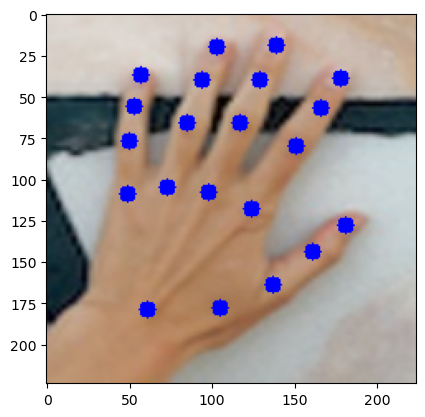

In [7]:
import matplotlib.pyplot as plt

def draw_circle(image, x, y):
    cv2.circle(image, (int(x), int(y)), 5, (0, 0, 255), -1) # 빨간색 원 그리기
tmp = img.copy()

# 이미지에 원 그리기
for point in lms:
    x, y, _ = point
    draw_circle(tmp, x, y)

plt.imshow(tmp)


## 3 hand image inference

In [8]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

net = cv2.dnn.readNet('hand_landmark.onnx')
outNames = net.getUnconnectedOutLayersNames()

def inference(img_name):
    img = cv2.imread(img_name)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    tensor = img / 127.5 - 1.0
    blob = cv2.dnn.blobFromImage(tensor.astype(np.float32), swapRB=False, crop=False)
    net.setInput(blob)
    preds = net.forward(outNames)
    lms = preds[0].reshape(21, 3) 
    return img, lms


def draw_circle(image, lms):
    print(lms)
    # 이미지에 원 그리기
    for point in lms:
        x, y, _ = point
        cv2.circle(image, (int(x), int(y)), 5, (0, 0, 255), -1) # 빨간색 원 그리기

img, lms = inference("palm1.JPG")
draw_circle(img, lms)
plt.imshow(img)


[[126.594536   184.06903     -0.01458853]
 [ 80.205376   174.89395     -9.034648  ]
 [ 55.730125   149.79465    -19.764786  ]
 [ 41.44483    118.76322    -26.205418  ]
 [ 25.811901    91.156975   -33.207108  ]
 [ 94.470436   128.31358    -44.924297  ]
 [ 87.821686    67.92357    -46.5832    ]
 [ 82.98898     39.178665   -40.119373  ]
 [ 79.68132     18.872942   -36.40353   ]
 [128.59026    125.65081    -40.2689    ]
 [125.16081     66.77676    -46.61625   ]
 [121.22427     30.824253   -44.086067  ]
 [120.665215     6.3611693  -42.392094  ]
 [156.26622    125.52081    -32.090725  ]
 [160.72752     71.132904   -34.500675  ]
 [162.90497     36.045547   -33.24818   ]
 [165.63605     10.623835   -34.660397  ]
 [174.59492    128.53876    -23.438229  ]
 [186.5403      92.68252    -26.07793   ]
 [193.91853     71.71498    -27.866518  ]
 [198.82635     54.99622    -29.618044  ]]


Error in callback <function flush_figures at 0x000002D93EF3C8B0> (for post_execute):


KeyboardInterrupt: 

[[106.63232    175.0914      -0.01682585]
 [ 66.712685   161.80528    -12.925972  ]
 [ 48.20749    127.84464    -28.026413  ]
 [ 46.88147     96.63188    -37.309315  ]
 [ 48.07438     68.64084    -47.316628  ]
 [ 66.37374    137.00142    -65.596954  ]
 [ 70.78745     76.746796   -79.76615   ]
 [ 73.98591     46.278816   -78.057304  ]
 [ 74.56921     29.640245   -75.23412   ]
 [106.48492    134.32004    -59.65193   ]
 [120.72058     68.86304    -73.646034  ]
 [119.66736     34.84979    -65.36111   ]
 [113.970535    18.498337   -58.36712   ]
 [139.06021    130.41461    -51.477432  ]
 [151.11253     70.233574   -58.469883  ]
 [148.56589     42.50034    -48.271854  ]
 [144.163       31.905378   -41.42714   ]
 [161.12366    127.75564    -43.0485    ]
 [170.12648     82.60645    -45.108055  ]
 [166.34064     63.892776   -38.504105  ]
 [160.23755     59.087624   -33.926136  ]]


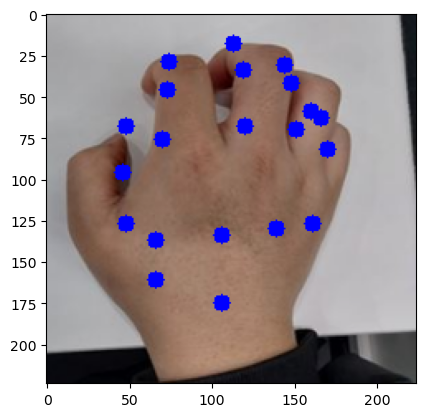

In [ ]:
img, lms = inference("palm2.JPG")
draw_circle(img, lms)
plt.imshow(img)


[[108.94206    176.05307     -0.00989121]
 [ 66.63211    156.35696    -13.882428  ]
 [ 43.970314   118.620224   -28.569641  ]
 [ 45.131695    83.90769    -37.969234  ]
 [ 64.411514    63.89466    -47.19398   ]
 [ 78.37755    126.432594   -62.405754  ]
 [ 80.9642      74.20769    -70.32052   ]
 [ 74.78648     55.93254    -63.078762  ]
 [ 69.39938     54.504433   -55.668102  ]
 [116.19742    124.66215    -56.450626  ]
 [113.28812     70.35899    -63.33058   ]
 [101.88953     50.119297   -47.65332   ]
 [ 93.367805    47.89171    -36.144737  ]
 [146.24028    122.291504   -49.578365  ]
 [139.834       70.69418    -51.78156   ]
 [127.0515      50.802727   -37.46406   ]
 [118.22893     50.715637   -28.425808  ]
 [167.25273    120.39207    -43.55783   ]
 [159.85179     78.2602     -44.285862  ]
 [146.55978     62.962257   -35.72725   ]
 [135.62076     66.65822    -30.061409  ]]


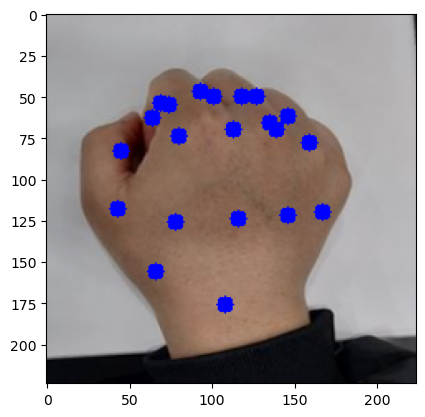

In [ ]:
img, lms = inference("palm3.JPG")
draw_circle(img, lms)
plt.imshow(img)


## webcam hand detection(with nms)

In [ ]:
import cv2
import time
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def get_rect(frame, regressor, classificator, stride, anchor_count, column, row, anchor, offset):
    index = (int(row * 128 / stride) + column) * anchor_count + anchor + offset

    score = sigmoid(regressor[index][0])
    if score < 0.7: return None

    x, y, w, h = classificator[index][:4]

    x += (column + 0.5) * stride - w / 2
    y += (row    + 0.5) * stride - h / 2
    x = int(x)
    y = int(y)
    w = int(w)
    h = int(h)
    rect = [x, y, w, h, score]
    return rect

def get_rects(frame, regressor, classificator):
    rects = []
    for y in range(16):
        for x in range(16):
            for a in range(2):
                rect = get_rect(frame, regressor[0], classificator[0], 8, 2, x, y, a, 0)
                if rect is not None:
                    rects.append(rect)

    for y in range(8):
        for x in range(8):
            for a in range(6):
                rect = get_rect(frame, regressor[0], classificator[0], 16, 6, x, y, a, 512)
                if rect is not None:
                    rects.append(rect)
    return rects

net = cv2.dnn.readNet('palm_detection.onnx')
outNames = net.getUnconnectedOutLayersNames()
print(outNames)
cap = cv2.VideoCapture(0)

while True:
    time_start = time.time()
    ret, frame = cap.read()

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, dsize=(128, 128))
    tensor = (frame / 127.5 - 1.0).reshape((128, 128, 3))
    blob = cv2.dnn.blobFromImage(tensor.astype(np.float32), swapRB=False, crop=False)
    net.setInput(blob)
    preds = net.forward(outNames)
    regressor = preds[0]
    classificator = preds[1]

    rects = get_rects(frame, regressor, classificator)
    if len(rects) > 0:
        indices = cv2.dnn.NMSBoxes(
            [rect[:4] for rect in rects],  # bounding box 좌표
            [rect[4] for rect in rects],   # confidence 값
            score_threshold=0.5,              # confidence 임계값
            nms_threshold=0.4                 # NMS 임계값
        )

        # NMS 결과를 반영하여 bounding box 그리기
        for i in indices:
            x, y, w, h, _ = rects[i]
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)


    frame = cv2.resize(frame, dsize=(640, 480))

    if cv2.waitKey(1) == ord('q'):
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    time_cur = time.time()
    cv2.putText(frame, f"time spend: {time_cur - time_start}", (0, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (125, 125, 125), 2)
    cv2.imshow('Camera Streaming', frame)

cap.release()
cv2.destroyAllWindows()


('classificators', 'regressors')


C:\Users\addinedu\AppData\Local\Temp\ipykernel_1172\2701830053.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


## hand detection with denormalization

In [ ]:
import cv2
import time
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def get_rect(regressor, classificator, stride, anchor_count, column, row, anchor, offset):
    index = (int(row * 128 / stride) + column) * anchor_count + anchor + offset

    score = sigmoid(regressor[index][0])
    if score < 0.7: return None

    x, y, w, h = classificator[index][:4]

    x += (column + 0.5) * stride - w / 2
    y += (row    + 0.5) * stride - h / 2
    x = int(x * img_detect_ratio_width)
    y = int(y * img_detect_ratio_height)
    w = int(w * img_detect_ratio_width)
    h = int(h * img_detect_ratio_height)
    rect = [x, y, w, h, score]
    return rect

def get_rects(regressor, classificator):
    rects = []
    for y in range(16):
        for x in range(16):
            for a in range(2):
                rect = get_rect(regressor[0], classificator[0], 8, 2, x, y, a, 0)
                if rect is not None:
                    rects.append(rect)

    for y in range(8):
        for x in range(8):
            for a in range(6):
                rect = get_rect(regressor[0], classificator[0], 16, 6, x, y, a, 512)
                if rect is not None:
                    rects.append(rect)
    return rects

img_width = 640
img_height = 480
detect_width = 128
detect_height = 128

img_detect_ratio_width = img_width / detect_width
img_detect_ratio_height = img_height / detect_height


net = cv2.dnn.readNet('palm_detection.onnx')
outNames = net.getUnconnectedOutLayersNames()
print(outNames)
cap = cv2.VideoCapture(0)

while True:
    time_start = time.time()
    ret, frame = cap.read()

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img_detect = cv2.resize(frame, dsize=(detect_width, detect_height))
    img_detect = (img_detect / 127.5 - 1.0).reshape((detect_width, detect_height, 3))
    blob = cv2.dnn.blobFromImage(img_detect.astype(np.float32), swapRB=False, crop=False)
    net.setInput(blob)
    preds = net.forward(outNames)
    regressor = preds[0]
    classificator = preds[1]

    rects = get_rects(regressor, classificator)
    if len(rects) > 0:
        indices = cv2.dnn.NMSBoxes(
            [rect[:4] for rect in rects],  # bounding box 좌표
            [rect[4] for rect in rects],   # confidence 값
            score_threshold=0.5,              # confidence 임계값
            nms_threshold=0.4                 # NMS 임계값
        )

        # NMS 결과를 반영하여 bounding box 그리기
        for i in indices:
            x, y, w, h, _ = rects[i]
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)



    if cv2.waitKey(1) == ord('q'):
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    time_cur = time.time()
    cv2.putText(frame, f"time spend: {time_cur - time_start}", (0, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (125, 125, 125), 2)
    cv2.imshow('Camera Streaming', frame)

cap.release()
cv2.destroyAllWindows()


('classificators', 'regressors')


C:\Users\addinedu\AppData\Local\Temp\ipykernel_8208\280153707.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


## color filtering

In [35]:
import cv2
import time
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def get_rect(regressor, classificator, stride, anchor_count, column, row, anchor, offset):
    index = (int(row * 128 / stride) + column) * anchor_count + anchor + offset

    score = sigmoid(regressor[index][0])
    if score < 0.7: return None

    x, y, w, h = classificator[index][:4]

    x += (column + 0.5) * stride - w / 2
    y += (row    + 0.5) * stride - h / 2
    x = int(x * img_detect_ratio_width)
    y = int(y * img_detect_ratio_height)
    w = int(w * img_detect_ratio_width)
    h = int(h * img_detect_ratio_height)
    rect = [x, y, w, h, score]
    return rect

def get_rects(regressor, classificator):
    rects = []
    for y in range(16):
        for x in range(16):
            for a in range(2):
                rect = get_rect(regressor[0], classificator[0], 8, 2, x, y, a, 0)
                if rect is not None:
                    rects.append(rect)

    for y in range(8):
        for x in range(8):
            for a in range(6):
                rect = get_rect(regressor[0], classificator[0], 16, 6, x, y, a, 512)
                if rect is not None:
                    rects.append(rect)
    return rects

def get_color_filtered_boxes(image):
    # 이미지를 HSV 색 공간으로 변환
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # 살색 영역을 마스크로 만들기
    skin_mask = cv2.inRange(hsv_image, lower_skin, upper_skin)
    # 모폴로지 연산을 위한 구조 요소 생성
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
    # 모폴로지 열림 연산 적용
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel)

    # 마스크를 이용하여 살색 영역 추출
    skin_image = cv2.bitwise_and(image, image, mask=skin_mask)

    # 살색 영역에 대한 바운딩 박스 추출
    contours, _ = cv2.findContours(skin_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bounding_boxes = [cv2.boundingRect(cnt) for cnt in contours]
        
    # 크기가 작은 박스와 큰 박스 제거
    color_boxes = []
    for (x, y, w, h) in bounding_boxes:
        if w * h > 100 * 100 and w * h < 300 * 300:
            # 약간 박스 더크게
            color_boxes.append((x - 30, y - 30, w + 60, h + 60))
    return color_boxes

def get_detected_boxes(image):
    img = image.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_detect = cv2.resize(img, dsize=(detect_width, detect_height))
    img_detect = (img_detect / 127.5 - 1.0).reshape((detect_width, detect_height, 3))
    blob = cv2.dnn.blobFromImage(img_detect.astype(np.float32), swapRB=False, crop=False)
    net.setInput(blob)
    preds = net.forward(outNames)
    regressor = preds[0]
    classificator = preds[1]

    rects = get_rects(regressor, classificator)
    
    nms_boxes = []
    if len(rects) > 0:
        indices = cv2.dnn.NMSBoxes(
            [rect[:4] for rect in rects],  # bounding box 좌표
            [rect[4] for rect in rects],   # confidence 값
            score_threshold=0.5,              # confidence 임계값
            nms_threshold=0.4                 # NMS 임계값
        )
        for i in indices:
            x, y, w, h, _ = rects[i]
            nms_boxes.append([x, y, w, h])
    return nms_boxes

# 살색 영역의 범위 지정 (HSV 색 공간)
lower_skin = np.array([0, 20, 70], dtype=np.uint8)
upper_skin = np.array([20, 255, 255], dtype=np.uint8)

img_width = 640
img_height = 480
detect_width = 128
detect_height = 128

img_detect_ratio_width = img_width / detect_width
img_detect_ratio_height = img_height / detect_height


net = cv2.dnn.readNet('palm_detection.onnx')
outNames = net.getUnconnectedOutLayersNames()
print(outNames)
cap = cv2.VideoCapture(0)

while True:
    time_start = time.time()
    ret, frame = cap.read()

    skin_image = frame.copy()
    # 크기가 작은 박스와 큰 박스 제거
    color_boxes = get_color_filtered_boxes(skin_image)

    # 바운딩 박스를 이미지에 그리기
    for (x, y, w, h) in color_boxes:
        cv2.rectangle(skin_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    
    """
    detected_boxes = get_detected_boxes(frame)

    # NMS 결과를 반영하여 bounding box 그리기
    for detected_box in detected_boxes:
        x, y, w, h = detected_box
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    """

    if cv2.waitKey(1) == ord('q'):
        break
    time_cur = time.time()
    cv2.putText(frame, f"time spend: {time_cur - time_start}", (0, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (125, 125, 125), 2)
    cv2.imshow('Camera Streaming', frame)
    cv2.imshow('Skin Extraction', skin_image)

cap.release()
cv2.destroyAllWindows()


('classificators', 'regressors')


## hand landmark inference with color space filtering

In [1]:
import cv2
import time
import numpy as np


def get_color_filtered_boxes(image):
    # 이미지를 HSV 색 공간으로 변환
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # 살색 영역을 마스크로 만들기
    skin_mask = cv2.inRange(hsv_image, lower_skin, upper_skin)
    # 모폴로지 연산을 위한 구조 요소 생성
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
    # 모폴로지 열림 연산 적용
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel)

    # 마스크를 이용하여 살색 영역 추출
    skin_image = cv2.bitwise_and(image, image, mask=skin_mask)

    # 살색 영역에 대한 바운딩 박스 추출
    contours, _ = cv2.findContours(skin_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bounding_boxes = [cv2.boundingRect(cnt) for cnt in contours]
        
    # 크기가 작은 박스와 큰 박스 제거
    color_boxes = []
    for (x, y, w, h) in bounding_boxes:
        if w * h > 100 * 100:
            # 약간 박스 더크게
            color_boxes.append((x - 30, y - 30, w + 60, h + 60))
    return color_boxes


def landmark_inference(img, cbox_ratio_width, cbox_ratio_height):
    img = cv2.resize(img, (lm_infer_width, lm_infer_height))
    tensor = img / 127.5 - 1.0
    blob = cv2.dnn.blobFromImage(tensor.astype(np.float32), swapRB=False, crop=False)
    net.setInput(blob)
    preds = net.forward(outNames)
    lms = preds[0].reshape(21, 3) 
    
    lms_ratio = []
    for lm in lms:
        x = lm[0] * cbox_ratio_width
        y = lm[1] * cbox_ratio_height
        z = lm[2] * cbox_ratio_height
        lms_ratio.append([x, y, z])
    return lms_ratio

def draw_circle(image, color_box, lms):
    x, y, w, h = color_box

    # 이미지에 원 그리기
    for point in lms:
        pt_x, pt_y, _ = point
        cv2.circle(image, (int(x + pt_x), int(y + pt_y)), 5, (0, 0, 255), -1) # 빨간색 원 그리기




# 살색 영역의 범위 지정 (HSV 색 공간)
lower_skin = np.array([0, 20, 70], dtype=np.uint8)
upper_skin = np.array([20, 255, 255], dtype=np.uint8)

img_width = 640
img_height = 480
lm_infer_width = 224
lm_infer_height = 224


net = cv2.dnn.readNet('hand_landmark.onnx')
outNames = net.getUnconnectedOutLayersNames()
print(outNames)
cap = cv2.VideoCapture("hand.mp4")

while True:
    time_start = time.time()
    try:
        ret, frame = cap.read()
        frame = cv2.resize(frame, (img_width, img_height))

        skin_image = frame.copy()
        # 크기가 작은 박스와 큰 박스 제거
        color_boxes = get_color_filtered_boxes(skin_image)

        # 바운딩 박스를 이미지에 그리기
        for (x, y, w, h) in color_boxes:
            cv2.rectangle(skin_image, (x, y), (x + w, y + h), (0, 255, 0), 2)


        for idx, color_box in enumerate(color_boxes):
            x, y, w, h = color_box
            cbox_ratio_width = w / lm_infer_width
            cbox_ratio_height = h / lm_infer_height

            roi = frame[y:y+h, x:x+w]
            lms = landmark_inference(roi, cbox_ratio_width, cbox_ratio_height)
            
            draw_circle(frame, color_box, lms)

        if cv2.waitKey(1) == ord('q'):
            break
        time_cur = time.time()
        cv2.putText(frame, f"time spend: {time_cur - time_start}", (0, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (125, 125, 125), 2)
        
        #frame = cv2.resize(frame, (320, 240))
        cv2.imshow('Camera Streaming', frame)
        cv2.imshow('Skin Extraction', skin_image)
    except Exception as e:
        break

cap.release()
cv2.destroyAllWindows()





('Identity', 'Identity_1', 'Identity_2')


## lms 3d plotting test

[[126.594536   184.06903     -0.01458853]
 [ 80.205376   174.89395     -9.034648  ]
 [ 55.730125   149.79465    -19.764786  ]
 [ 41.44483    118.76322    -26.205418  ]
 [ 25.811901    91.156975   -33.207108  ]
 [ 94.470436   128.31358    -44.924297  ]
 [ 87.821686    67.92357    -46.5832    ]
 [ 82.98898     39.178665   -40.119373  ]
 [ 79.68132     18.872942   -36.40353   ]
 [128.59026    125.65081    -40.2689    ]
 [125.16081     66.77676    -46.61625   ]
 [121.22427     30.824253   -44.086067  ]
 [120.665215     6.3611693  -42.392094  ]
 [156.26622    125.52081    -32.090725  ]
 [160.72752     71.132904   -34.500675  ]
 [162.90497     36.045547   -33.24818   ]
 [165.63605     10.623835   -34.660397  ]
 [174.59492    128.53876    -23.438229  ]
 [186.5403      92.68252    -26.07793   ]
 [193.91853     71.71498    -27.866518  ]
 [198.82635     54.99622    -29.618044  ]]


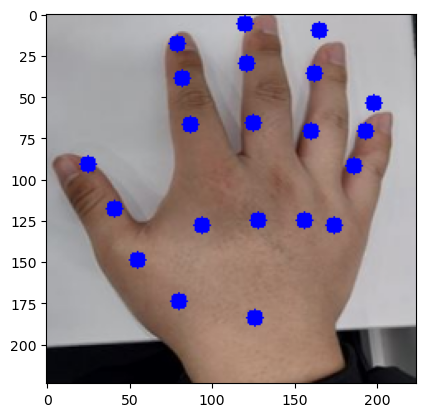

In [5]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

net = cv2.dnn.readNet('hand_landmark.onnx')
outNames = net.getUnconnectedOutLayersNames()

def inference(img_name):
    img = cv2.imread(img_name)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    tensor = img / 127.5 - 1.0
    blob = cv2.dnn.blobFromImage(tensor.astype(np.float32), swapRB=False, crop=False)
    net.setInput(blob)
    preds = net.forward(outNames)
    lms = preds[0].reshape(21, 3) 
    return img, lms


def draw_circle(image, lms):
    print(lms)
    # 이미지에 원 그리기
    for point in lms:
        x, y, _ = point
        cv2.circle(image, (int(x), int(y)), 5, (0, 0, 255), -1) # 빨간색 원 그리기
np.set_printoptions(suppress=True)
img, lms = inference("palm1.JPG")
draw_circle(img, lms)
plt.imshow(img)

## 3D interactive plot test

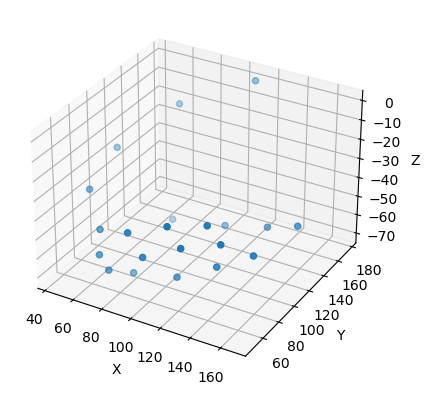

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 3차원 데이터
data = np.array([[108.94206, 176.05307, -0.00989121],
                 [66.63211, 156.35696, -13.882428],
                 [43.970314, 118.620224, -28.569641],
                 [45.131695, 83.90769, -37.969234],
                 [64.411514, 63.89466, -47.19398],
                 [78.37755, 126.432594, -62.405754],
                 [80.9642, 74.20769, -70.32052],
                 [74.78648, 55.93254, -63.078762],
                 [69.39938, 54.504433, -55.668102],
                 [116.19742, 124.66215, -56.450626],
                 [113.28812, 70.35899, -63.33058],
                 [101.88953, 50.119297, -47.65332],
                 [93.367805, 47.89171, -36.144737],
                 [146.24028, 122.291504, -49.578365],
                 [139.834, 70.69418, -51.78156],
                 [127.0515, 50.802727, -37.46406],
                 [118.22893, 50.715637, -28.425808],
                 [167.25273, 120.39207, -43.55783],
                 [159.85179, 78.2602, -44.285862],
                 [146.55978, 62.962257, -35.72725],
                 [135.62076, 66.65822, -30.061409]])

# 데이터 분리
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

# 3차원 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# 축 레이블 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 그래프 출력
plt.show()



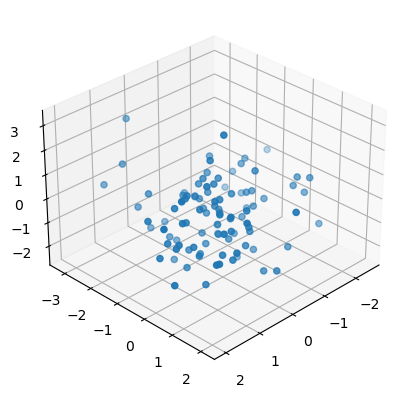

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3차원 데이터 생성
x = np.random.randn(100)
y = np.random.randn(100)
z = np.random.randn(100)

# 3D 산점도 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# 시점 변경
ax.view_init(azim=45, elev=30)

# 그래프 출력
plt.show()


In [8]:
#https://www.mssqltips.com/sqlservertip/7607/python-matplotlib-interactive-data/
%matplotlib widget

ModuleNotFoundError: No module named 'ipympl'

In [10]:
!pip install ipympl --user

  Using cached ipympl-0.9.3-py2.py3-none-any.whl (511 kB)
  Using cached ipywidgets-8.1.1-py3-none-any.whl.metadata (2.4 kB)
  Using cached matplotlib-3.7.4-cp38-cp38-win_amd64.whl.metadata (5.8 kB)
Using cached ipywidgets-8.1.1-py3-none-any.whl (139 kB)
Using cached matplotlib-3.7.4-cp38-cp38-win_amd64.whl (7.5 MB)


In [5]:
!pip install pandas

   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
    --------------------------------------- 0.2/10.8 MB 3.3 MB/s eta 0:00:04
   ------------- -------------------------- 3.6/10.8 MB 37.9 MB/s eta 0:00:01
   ------------------- -------------------- 5.2/10.8 MB 48.0 MB/s eta 0:00:01
   ------------------- -------------------- 5.2/10.8 MB 48.0 MB/s eta 0:00:01
   -------------------------------- ------- 8.7/10.8 MB 37.1 MB/s eta 0:00:01
   ---------------------------------------  10.8/10.8 MB 54.4 MB/s eta 0:00:01
   ---------------------------------------- 10.8/10.8 MB 46.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/502.5 kB ? eta -:--:--
   --------------------------------------- 502.5/502.5 kB 15.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/346.6 kB ? eta -:--:--
   --------------------------------------- 346.6/346.6 kB 21.0 MB/s eta 0:00:00


In [1]:
%matplotlib widget

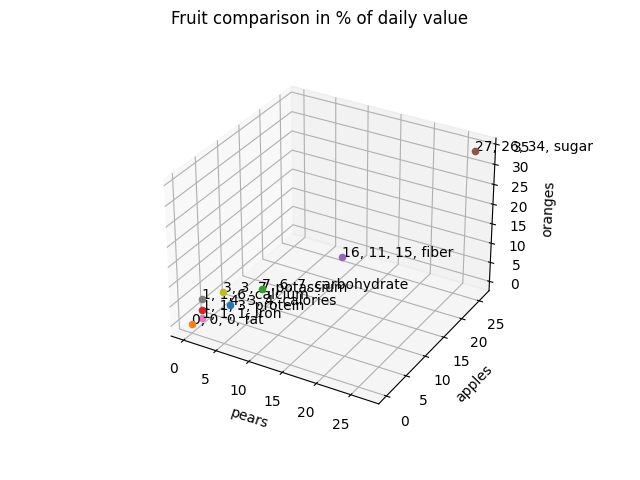

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

labels = np.array(['calories','fat','carbohydrate','protein','fiber','sugar', 'iron', 'calcium','potassium'])
x = np.array([4,0,7,1,16,27,1,1,3]) # pears
y = np.array([3,0,6,1,11,26,1,1,3]) # apples
z = np.array([4,0,7,3,15,34,1,6,7]) # oranges

points = list(zip(x, y, z, labels))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for pts in points:
    x = pts[0]
    y = pts[1]
    z = pts[2]
    label = f'{x}, {y}, {z}, {pts[3]}'
    ax.scatter(x, y, z)
    ax.text(x, y, z, label)

    ax.set_xlabel('pears')
    ax.set_ylabel('apples')
    ax.set_zlabel('oranges')
    fig.suptitle('Fruit comparison in % of daily value')

## 3d hand landmark interactive plot

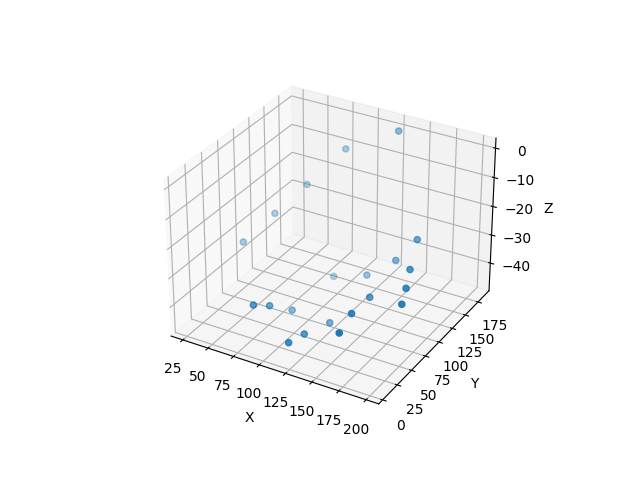

In [16]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

net = cv2.dnn.readNet('hand_landmark.onnx')
outNames = net.getUnconnectedOutLayersNames()

def inference(img_name):
    img = cv2.imread(img_name)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    tensor = img / 127.5 - 1.0
    blob = cv2.dnn.blobFromImage(tensor.astype(np.float32), swapRB=False, crop=False)
    net.setInput(blob)
    preds = net.forward(outNames)
    lms = preds[0].reshape(21, 3) 
    return img, lms


def draw_circle(image, lms):
    print(lms)
    # 이미지에 원 그리기
    for point in lms:
        x, y, _ = point
        cv2.circle(image, (int(x), int(y)), 5, (0, 0, 255), -1) # 빨간색 원 그리기
np.set_printoptions(suppress=True)
img, lms = inference("palm1.JPG")
"""
draw_circle(img, lms)
cv2.imshow("tmp", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
"""

# 데이터 분리
x = lms[:, 0]
y = lms[:, 1]
z = lms[:, 2]

# 3차원 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# 축 레이블 설정
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 그래프 출력
plt.show()


## add color to 3d plot

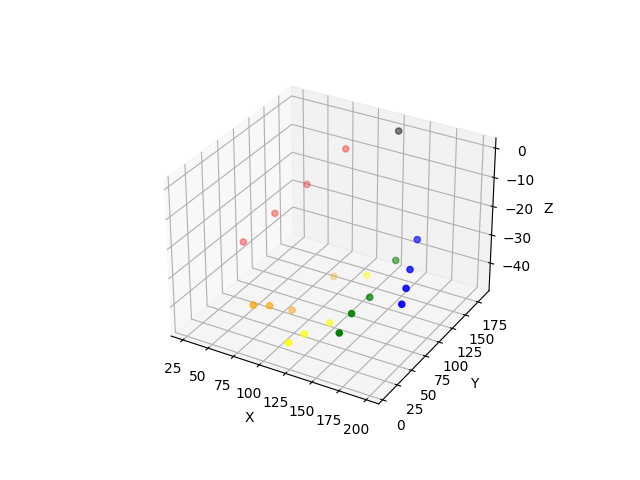

In [19]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

net = cv2.dnn.readNet('hand_landmark.onnx')
outNames = net.getUnconnectedOutLayersNames()

def inference(img_name):
    img = cv2.imread(img_name)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    tensor = img / 127.5 - 1.0
    blob = cv2.dnn.blobFromImage(tensor.astype(np.float32), swapRB=False, crop=False)
    net.setInput(blob)
    preds = net.forward(outNames)
    lms = preds[0].reshape(21, 3) 
    return img, lms


def draw_circle(image, lms):
    print(lms)
    # 이미지에 원 그리기
    for point in lms:
        x, y, _ = point
        cv2.circle(image, (int(x), int(y)), 5, (0, 0, 255), -1) # 빨간색 원 그리기
np.set_printoptions(suppress=True)
img, lms = inference("palm1.JPG")


# 색상 지정
colors = ['black'] + ['red'] * 4 + ['orange'] * 4 + ['yellow'] * 4 + ['green'] * 4 + ['blue'] * 4

# 3차원 산점도 그리기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = lms[:, 0]
y = lms[:, 1]
z = lms[:, 2]

ax.scatter(x, y, z, c=colors)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


## draw vertex lines

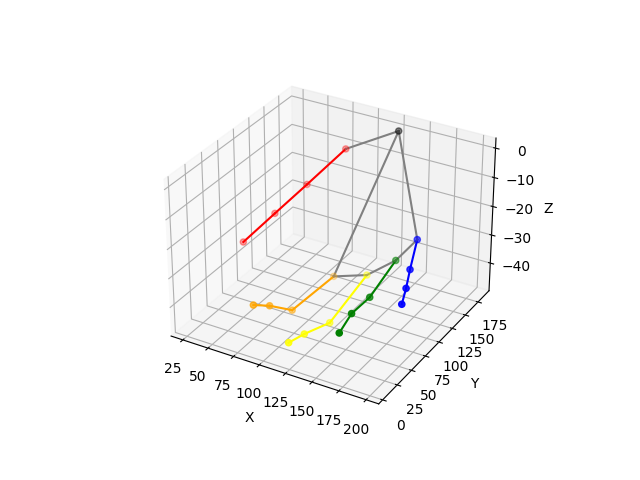

In [26]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

net = cv2.dnn.readNet('hand_landmark.onnx')
outNames = net.getUnconnectedOutLayersNames()

def inference(img_name):
    img = cv2.imread(img_name)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    tensor = img / 127.5 - 1.0
    blob = cv2.dnn.blobFromImage(tensor.astype(np.float32), swapRB=False, crop=False)
    net.setInput(blob)
    preds = net.forward(outNames)
    lms = preds[0].reshape(21, 3) 
    return img, lms


def draw_circle(image, lms):
    print(lms)
    # 이미지에 원 그리기
    for point in lms:
        x, y, _ = point
        cv2.circle(image, (int(x), int(y)), 5, (0, 0, 255), -1) # 빨간색 원 그리기
np.set_printoptions(suppress=True)
img, lms = inference("palm1.JPG")


# 색상 지정
colors = ['black'] + ['red'] * 4 + ['orange'] * 4 + ['yellow'] * 4 + ['green'] * 4 + ['blue'] * 4

# 3차원 산점도 그리기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = lms[:, 0]
y = lms[:, 1]
z = lms[:, 2]

ax.scatter(x, y, z, c=colors)

#손가락
colors = ['red', 'orange', 'yellow', 'green', 'blue']
groups = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16], [17, 18, 19, 20]]
for i, group in enumerate(groups):
    for j in range(len(group)-1):
        plt.plot([x[group[j]], x[group[j+1]]], [y[group[j]], y[group[j+1]]], [z[group[j]], z[group[j+1]]], color=colors[i])
#손등
lines = [[0, 1], [0, 5], [0, 17], [5, 9], [9, 13], [13, 17]] 
for line in lines:
    ax.plot([x[line[0]], x[line[1]]], [y[line[0]], y[line[1]]], [z[line[0]], z[line[1]]], color='gray')



ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


## flip z, invert x axis

C:\Users\addinedu\AppData\Local\Temp\ipykernel_23468\3396033693.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


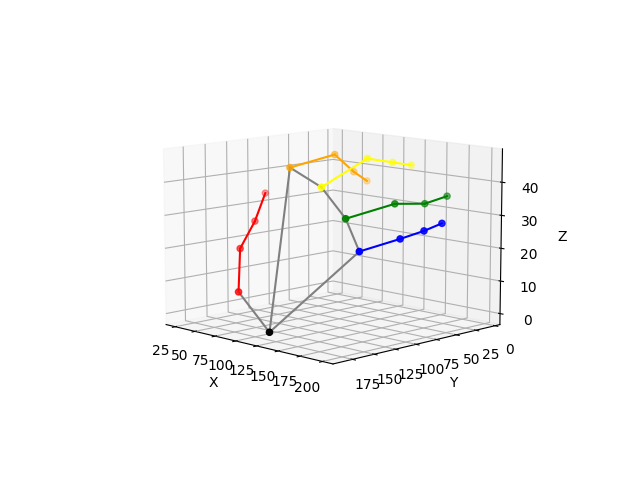

In [33]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

net = cv2.dnn.readNet('hand_landmark.onnx')
outNames = net.getUnconnectedOutLayersNames()

def inference(img_name):
    img = cv2.imread(img_name)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    tensor = img / 127.5 - 1.0
    blob = cv2.dnn.blobFromImage(tensor.astype(np.float32), swapRB=False, crop=False)
    net.setInput(blob)
    preds = net.forward(outNames)
    lms = preds[0].reshape(21, 3) 
    return img, lms


np.set_printoptions(suppress=True)
img, lms = inference("palm1.JPG")

# 색상 지정
colors = ['black'] + ['red'] * 4 + ['orange'] * 4 + ['yellow'] * 4 + ['green'] * 4 + ['blue'] * 4

# 3차원 산점도 그리기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10, azim=135)

x = lms[:, 0]
y = lms[:, 1]
z = -lms[:, 2]
plt.gca().invert_xaxis()
ax.scatter(x, y, z, c=colors)

#손가락
colors = ['red', 'orange', 'yellow', 'green', 'blue']
groups = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16], [17, 18, 19, 20]]
for i, group in enumerate(groups):
    for j in range(len(group)-1):
        plt.plot([x[group[j]], x[group[j+1]]], [y[group[j]], y[group[j+1]]], [z[group[j]], z[group[j+1]]], color=colors[i])
#손등
lines = [[0, 1], [0, 5], [0, 17], [5, 9], [9, 13], [13, 17]] 
for line in lines:
    ax.plot([x[line[0]], x[line[1]]], [y[line[0]], y[line[1]]], [z[line[0]], z[line[1]]], color='gray')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


## hand landmark 3d plot

In [53]:
import cv2
import time
import numpy as np
import traceback


def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def get_rect(regressor, classificator, stride, anchor_count, column, row, anchor, offset):
    index = (int(row * 128 / stride) + column) * anchor_count + anchor + offset

    score = sigmoid(regressor[index][0])
    if score < 0.7: return None

    x, y, w, h = classificator[index][:4]

    x += (column + 0.5) * stride - w / 2
    y += (row    + 0.5) * stride - h / 2
    x = int(x * img_detect_ratio_width)
    y = int(y * img_detect_ratio_height)
    w = int(w * img_detect_ratio_width)
    h = int(h * img_detect_ratio_height)
    rect = [x, y, w, h, score]
    return rect

def get_rects(regressor, classificator):
    rects = []
    for y in range(16):
        for x in range(16):
            for a in range(2):
                rect = get_rect(regressor[0], classificator[0], 8, 2, x, y, a, 0)
                if rect is not None:
                    rects.append(rect)

    for y in range(8):
        for x in range(8):
            for a in range(6):
                rect = get_rect(regressor[0], classificator[0], 16, 6, x, y, a, 512)
                if rect is not None:
                    rects.append(rect)
    return rects
def get_detected_boxes(image):
    img = image.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_detect = cv2.resize(img, dsize=(detect_width, detect_height))
    img_detect = (img_detect / 127.5 - 1.0).reshape((detect_width, detect_height, 3))
    blob = cv2.dnn.blobFromImage(img_detect.astype(np.float32), swapRB=False, crop=False)
    net_palm.setInput(blob)
    preds = net_palm.forward(outNames_palm)
    regressor = preds[0]
    classificator = preds[1]

    rects = get_rects(regressor, classificator)
    
    nms_boxes = []
    if len(rects) > 0:
        indices = cv2.dnn.NMSBoxes(
            [rect[:4] for rect in rects],  # bounding box 좌표
            [rect[4] for rect in rects],   # confidence 값
            score_threshold=0.5,              # confidence 임계값
            nms_threshold=0.4                 # NMS 임계값
        )
        for i in indices:
            x, y, w, h, _ = rects[i]
            nms_boxes.append([x, y, w, h])
    return nms_boxes


def get_color_filtered_boxes(image):
    # 이미지를 HSV 색 공간으로 변환
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # 살색 영역을 마스크로 만들기
    skin_mask = cv2.inRange(hsv_image, lower_skin, upper_skin)
    # 모폴로지 연산을 위한 구조 요소 생성
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
    # 모폴로지 열림 연산 적용
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel)

    # 마스크를 이용하여 살색 영역 추출
    skin_image = cv2.bitwise_and(image, image, mask=skin_mask)

    # 살색 영역에 대한 바운딩 박스 추출
    contours, _ = cv2.findContours(skin_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bounding_boxes = [cv2.boundingRect(cnt) for cnt in contours]
        
    # 크기가 작은 박스와 큰 박스 제거
    color_boxes = []
    for (x, y, w, h) in bounding_boxes:
        if w * h > 100 * 100:
            # 약간 박스 더크게
            if w > h:
                color_boxes.append((x, y, w, w))
            else:
                color_boxes.append((x, y, h, h ))
    return color_boxes


def landmark_inference(img, cbox_ratio_width, cbox_ratio_height):
    img = cv2.resize(img, (lm_infer_width, lm_infer_height))
    tensor = img / 127.5 - 1.0
    blob = cv2.dnn.blobFromImage(tensor.astype(np.float32), swapRB=False, crop=False)
    net_lm.setInput(blob)
    preds = net_lm.forward(outNames_lm)
    lms = preds[0].reshape(21, 3) 
    
    lms_ratio = []
    for lm in lms:
        x = lm[0] * cbox_ratio_width
        y = lm[1] * cbox_ratio_height
        z = lm[2] * cbox_ratio_height
        lms_ratio.append([x, y, z])
    return lms_ratio

def draw_circle(image, color_box, lms):
    x, y, w, h = color_box

    # 이미지에 원 그리기
    for point in lms:
        pt_x, pt_y, _ = point
        cv2.circle(image, (int(x + pt_x), int(y + pt_y)), 5, (0, 0, 255), -1) # 빨간색 원 그리기




# 살색 영역의 범위 지정 (HSV 색 공간)
lower_skin = np.array([0, 20, 70], dtype=np.uint8)
upper_skin = np.array([20, 255, 255], dtype=np.uint8)

img_width = 640
img_height = 480
lm_infer_width = 224
lm_infer_height = 224
detect_width = 128
detect_height = 128

img_detect_ratio_width = img_width / detect_width
img_detect_ratio_height = img_height / detect_height

net_lm = cv2.dnn.readNet('hand_landmark.onnx')
outNames_lm = net_lm.getUnconnectedOutLayersNames()
print(outNames_lm)
net_palm = cv2.dnn.readNet('palm_detection.onnx')
outNames_palm = net_palm.getUnconnectedOutLayersNames()
print(outNames_palm)

cap = cv2.VideoCapture("hand_240104.mp4")

while True:
    time_start = time.time()
    try:
        ret, frame = cap.read()
        frame = cv2.resize(frame, (img_width, img_height))

        skin_image = frame.copy()
        # 크기가 작은 박스와 큰 박스 제거
        color_boxes = get_color_filtered_boxes(skin_image)

        # 바운딩 박스를 이미지에 그리기
        for (x, y, w, h) in color_boxes:
            cv2.rectangle(skin_image, (x, y), (x + w, y + h), (0, 255, 0), 2)


        for idx, color_box in enumerate(color_boxes):
            x, y, w, h = color_box
            cbox_ratio_width = w / lm_infer_width
            cbox_ratio_height = h / lm_infer_height

            roi = frame[y:y+h, x:x+w]
            lms = landmark_inference(roi, cbox_ratio_width, cbox_ratio_height)
            
            draw_circle(frame, color_box, lms)



        detected_boxes = get_detected_boxes(frame)

        # NMS 결과를 반영하여 bounding box 그리기
        for detected_box in detected_boxes:
            x, y, w, h = detected_box
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)





        if cv2.waitKey(1) == ord('q'):
            break
        time_cur = time.time()
        cv2.putText(frame, f"time spend: {time_cur - time_start}", (0, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (125, 125, 125), 2)
        
        #frame = cv2.resize(frame, (320, 240))
        cv2.imshow('Camera Streaming', frame)
        cv2.imshow('Skin Extraction', skin_image)
    except Exception as e:
        traceback.print_exc()

        break

cap.release()
cv2.destroyAllWindows()



('Identity', 'Identity_1', 'Identity_2')
('classificators', 'regressors')


C:\Users\addinedu\AppData\Local\Temp\ipykernel_23468\4171866779.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


## phone camera streaming

In [1]:
import cv2

# RTSP 스트리밍 주소
rtsp_url = "rtsp://192.168.0.181:8080/video/h264"

# OpenCV VideoCapture 객체 생성
cap = cv2.VideoCapture(rtsp_url)

# 비디오 프레임 수신 및 처리
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 비디오 프레임 처리
    # 여기에 원하는 코드를 작성하세요

    # 화면에 출력
    cv2.imshow('frame', frame)

    # 종료를 위한 키 입력
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 자원 해제
cap.release()
cv2.destroyAllWindows()

## streaming hand lm inference

In [16]:
import cv2
import time
import numpy as np
import traceback


def get_color_filtered_boxes(image):
    # 이미지를 HSV 색 공간으로 변환
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # 살색 영역을 마스크로 만들기
    skin_mask = cv2.inRange(hsv_image, lower_skin, upper_skin)
    # 모폴로지 연산을 위한 구조 요소 생성
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
    # 모폴로지 열림 연산 적용
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel)

    # 마스크를 이용하여 살색 영역 추출
    skin_image = cv2.bitwise_and(image, image, mask=skin_mask)

    # 살색 영역에 대한 바운딩 박스 추출
    contours, _ = cv2.findContours(skin_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bounding_boxes = [cv2.boundingRect(cnt) for cnt in contours]
        
    # 크기가 작은 박스와 큰 박스 제거
    color_boxes = []
    for (x, y, w, h) in bounding_boxes:
        if w * h > 100 * 100:
            # 약간 박스 더크게
            color_boxes.append((x - 30, y - 30, w + 60, h + 60))

    return color_boxes


def landmark_inference(img, cbox_ratio_width, cbox_ratio_height):
    img = cv2.resize(img, (lm_infer_width, lm_infer_height))
    tensor = img / 127.5 - 1.0
    blob = cv2.dnn.blobFromImage(tensor.astype(np.float32), swapRB=False, crop=False)
    net_lm.setInput(blob)
    preds = net_lm.forward(outNames_lm)
    lms = preds[0].reshape(21, 3) 
    
    lms_ratio = []
    for lm in lms:
        x = lm[0] * cbox_ratio_width
        y = lm[1] * cbox_ratio_height
        z = lm[2] * cbox_ratio_height
        lms_ratio.append([x, y, z])
    return lms_ratio

def draw_circle(image, color_box, lms):
    x, y, w, h = color_box

    # 이미지에 원 그리기
    for point in lms:
        pt_x, pt_y, _ = point
        cv2.circle(image, (int(x + pt_x), int(y + pt_y)), 5, (0, 0, 255), -1) # 빨간색 원 그리기




# 살색 영역의 범위 지정 (HSV 색 공간)
lower_skin = np.array([0, 20, 70], dtype=np.uint8)
upper_skin = np.array([20, 255, 255], dtype=np.uint8)

img_width = 640
img_height = 480
lm_infer_width = 224
lm_infer_height = 224

net_lm = cv2.dnn.readNet('hand_landmark.onnx')
outNames_lm = net_lm.getUnconnectedOutLayersNames()
print(outNames_lm)


# RTSP 스트리밍 주소
rtsp_url = "rtsp://192.168.0.181:8080/video/h264"

# OpenCV VideoCapture 객체 생성
cap = cv2.VideoCapture(rtsp_url)

while True:
    time_start = time.time()
    try:
        ret, frame = cap.read()
        frame = cv2.resize(frame, (img_width, img_height))
        
        skin_image = frame.copy()

        

        # 크기가 작은 박스와 큰 박스 제거
        color_boxes = get_color_filtered_boxes(skin_image)

        # 바운딩 박스를 이미지에 그리기
        for (x, y, w, h) in color_boxes:
            cv2.rectangle(skin_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        

        for idx, color_box in enumerate(color_boxes):
            x, y, w, h = color_box
            cbox_ratio_width = w / lm_infer_width
            cbox_ratio_height = h / lm_infer_height

            roi = frame[y:y+h, x:x+w]

            if roi.shape[0] == 0 or roi.shape[1] == 0:
                continue
            lms = landmark_inference(roi, cbox_ratio_width, cbox_ratio_height)
            
            draw_circle(frame, color_box, lms)
        
        
        if cv2.waitKey(1) == ord('q'):
            break
        time_cur = time.time()
        cv2.putText(frame, f"time spend: {time_cur - time_start}", (0, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (125, 125, 125), 2)

        cv2.imshow('Camera Streaming', frame)
        cv2.imshow('Skin Extraction', skin_image)
    except Exception as e:
        traceback.print_exc()

        break

cap.release()
cv2.destroyAllWindows()



('Identity', 'Identity_1', 'Identity_2')


Traceback (most recent call last):
  File "C:\Users\addinedu\AppData\Local\Temp\ipykernel_11960\3033782578.py", line 86, in <module>
    frame = cv2.resize(frame, (img_width, img_height))
cv2.error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



## lastest blaze hand model

In [3]:
import cv2
import time
import numpy as np


def get_color_filtered_boxes(image):
    # 이미지를 HSV 색 공간으로 변환
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # 살색 영역을 마스크로 만들기
    skin_mask = cv2.inRange(hsv_image, lower_skin, upper_skin)
    # 모폴로지 연산을 위한 구조 요소 생성
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
    # 모폴로지 열림 연산 적용
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel)

    # 마스크를 이용하여 살색 영역 추출
    skin_image = cv2.bitwise_and(image, image, mask=skin_mask)

    # 살색 영역에 대한 바운딩 박스 추출
    contours, _ = cv2.findContours(skin_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bounding_boxes = [cv2.boundingRect(cnt) for cnt in contours]
        
    # 크기가 작은 박스와 큰 박스 제거
    color_boxes = []
    for (x, y, w, h) in bounding_boxes:
        if w * h > 100 * 100:
            # 약간 박스 더크게
            color_boxes.append((x - 30, y - 30, w + 60, h + 60))
    return color_boxes


def landmark_inference(img, cbox_ratio_width, cbox_ratio_height):
    img = cv2.resize(img, (lm_infer_width, lm_infer_height))
    tensor = img / 127.5 - 1.0
    blob = cv2.dnn.blobFromImage(tensor.astype(np.float32), swapRB=False, crop=False)
    net.setInput(blob)
    preds = net.forward(outNames)
    #lms = preds[2].reshape(21, 3) 
    lms = preds[0].reshape(21, 3) 

    lms_ratio = []
    for lm in lms:
        """
        x = lm[0] * cbox_ratio_width * lm_infer_width
        y = lm[1] * cbox_ratio_height * lm_infer_height
        z = lm[2] * cbox_ratio_height * lm_infer_height
        """
        x = lm[0] * cbox_ratio_width 
        y = lm[1] * cbox_ratio_height 
        z = lm[2] * cbox_ratio_height


        lms_ratio.append([x, y, z])
    return lms_ratio

def draw_circle(image, color_box, lms):
    x, y, w, h = color_box

    # 이미지에 원 그리기
    for point in lms:
        pt_x, pt_y, _ = point
        cv2.circle(image, (int(x + pt_x), int(y + pt_y)), 5, (0, 0, 255), -1) # 빨간색 원 그리기




# 살색 영역의 범위 지정 (HSV 색 공간)
lower_skin = np.array([0, 20, 70], dtype=np.uint8)
upper_skin = np.array([20, 255, 255], dtype=np.uint8)

img_width = 640
img_height = 480
lm_infer_width = 256
lm_infer_height = 256

#net = cv2.dnn.readNet('blazehand.onnx')
net = cv2.dnn.readNet('hand_landmark.onnx')

outNames = net.getUnconnectedOutLayersNames()
print(outNames)
cap = cv2.VideoCapture("hand.mp4")

while True:
    time_start = time.time()
    try:
        ret, frame = cap.read()
        frame = cv2.resize(frame, (img_width, img_height))

        skin_image = frame.copy()
        # 크기가 작은 박스와 큰 박스 제거
        color_boxes = get_color_filtered_boxes(skin_image)

        # 바운딩 박스를 이미지에 그리기
        for (x, y, w, h) in color_boxes:
            cv2.rectangle(skin_image, (x, y), (x + w, y + h), (0, 255, 0), 2)


        for idx, color_box in enumerate(color_boxes):
            x, y, w, h = color_box
            cbox_ratio_width = w / lm_infer_width
            cbox_ratio_height = h / lm_infer_height

            roi = frame[y:y+h, x:x+w]
            lms = landmark_inference(roi, cbox_ratio_width, cbox_ratio_height)
            
            draw_circle(frame, color_box, lms)

        if cv2.waitKey(1) == ord('q'):
            break
        time_cur = time.time()
        cv2.putText(frame, f"time spend: {time_cur - time_start}", (0, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (125, 125, 125), 2)
        
        #frame = cv2.resize(frame, (320, 240))
        cv2.imshow('Camera Streaming', frame)
        cv2.imshow('Skin Extraction', skin_image)
    except Exception as e:
        print(e)
        break

cap.release()
cv2.destroyAllWindows()





('Identity', 'Identity_1', 'Identity_2')
